In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# from ggplot import *

In [4]:
df=pd.read_csv("HRDataset-v14.csv")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [5]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [6]:
df.shape

(311, 36)

<Axes: xlabel='PerformanceScore', ylabel='count'>

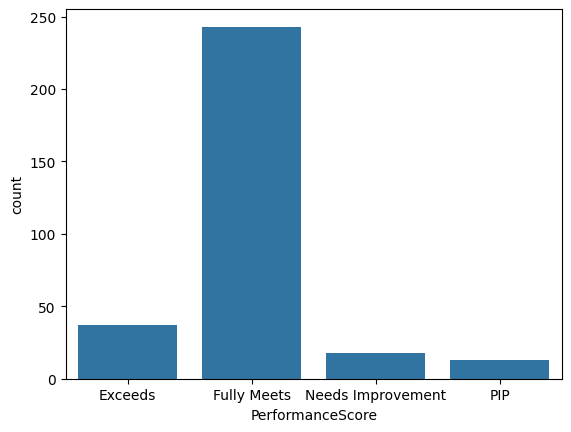

In [7]:
sns.countplot(x="PerformanceScore", data = df)

In [8]:
df.RecruitmentSource.value_counts()

RecruitmentSource
Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: count, dtype: int64

<Axes: xlabel='RecruitmentSource', ylabel='count'>

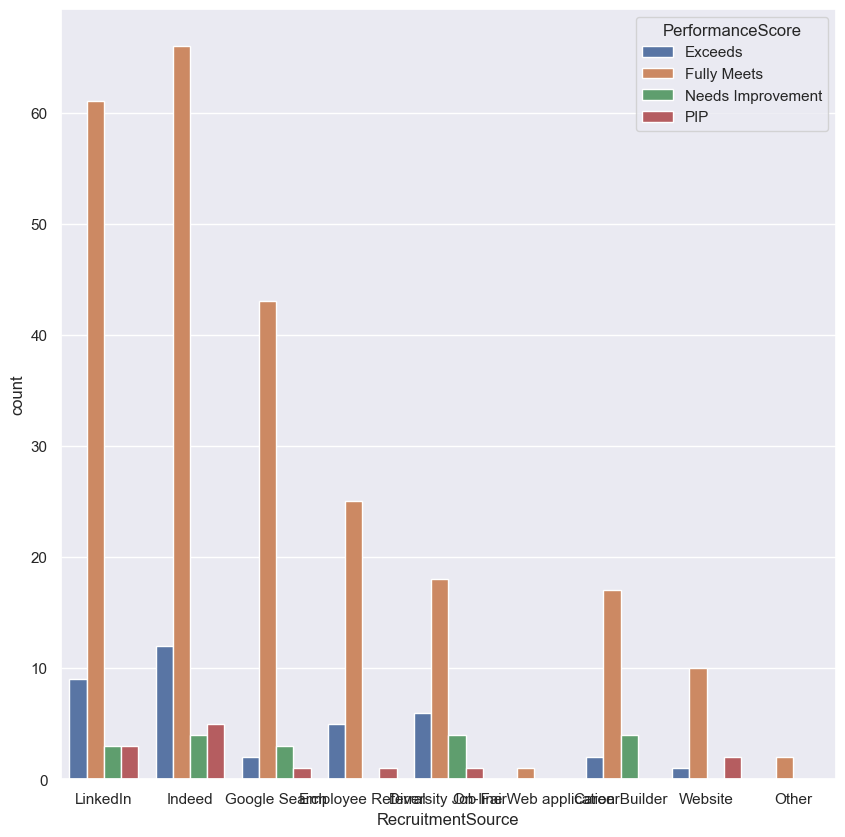

In [9]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(x="RecruitmentSource",hue="PerformanceScore",data=df)

In [10]:
x,y="RecruitmentSource","PerformanceScore"
df.groupby(x)[y].value_counts(normalize=True).mul(100).rename("Percent").reset_index()

,RecruitmentSource,PerformanceScore,Percent
0,CareerBuilder,Fully Meets,73.913043
1,CareerBuilder,Needs Improvement,17.391304
2,CareerBuilder,Exceeds,8.695652
3,Diversity Job Fair,Fully Meets,62.068966
4,Diversity Job Fair,Exceeds,20.689655
5,Diversity Job Fair,Needs Improvement,13.793103
6,Diversity Job Fair,PIP,3.448276
7,Employee Referral,Fully Meets,80.645161
8,Employee Referral,Exceeds,16.129032
9,Employee Referral,PIP,3.225806


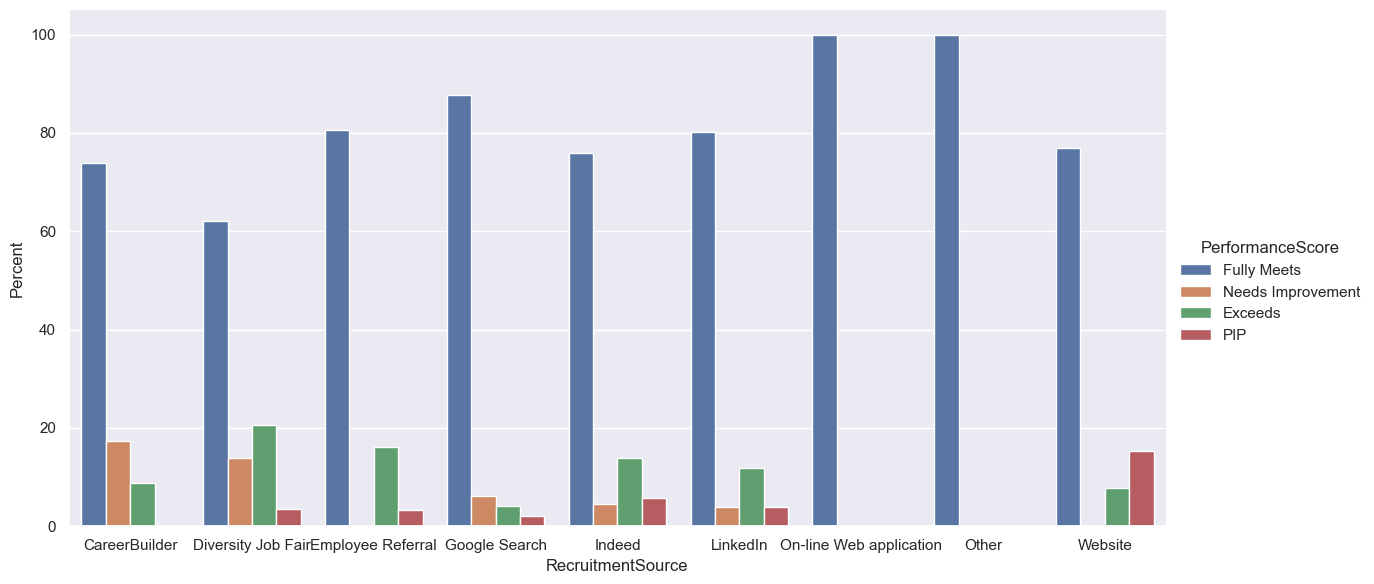

In [11]:
x,y="RecruitmentSource","PerformanceScore"
df.groupby(x)[y].value_counts(normalize=True).mul(100).rename("Percent").reset_index().pipe(
    (sns.catplot, 'data'), x=x, y='Percent', hue=y, kind='bar', height=6, aspect=2
)

In [12]:
#Now starting with the Multidimesional 
#Salary & engagemnet Survey us kind of corelated is our hypothesis

<Axes: xlabel='Salary', ylabel='EngagementSurvey'>

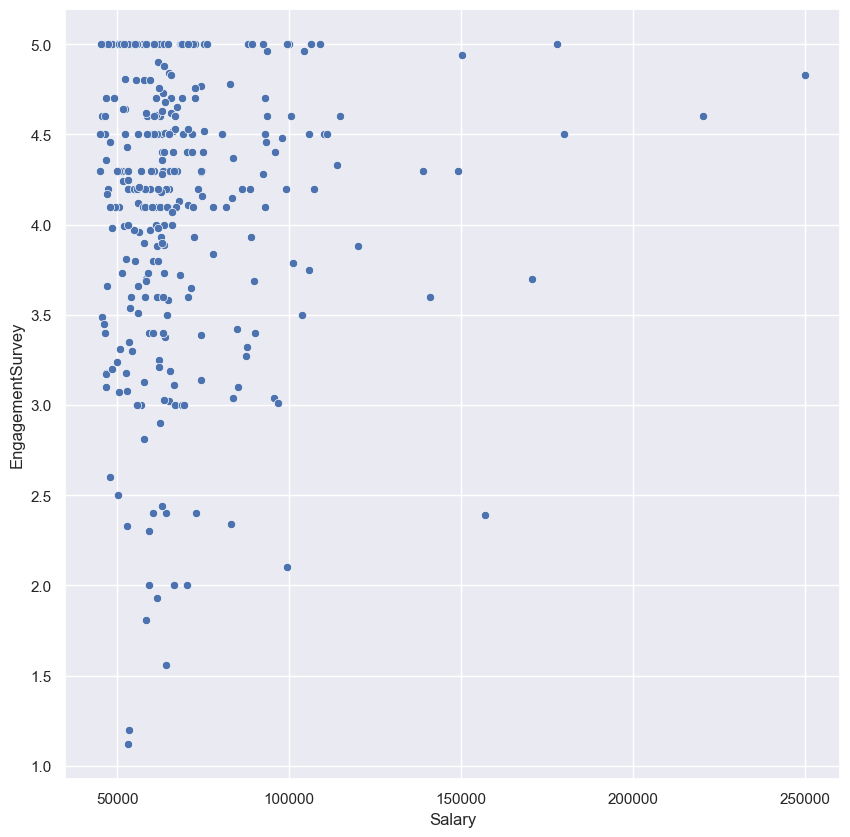

In [17]:
sns.scatterplot(x="Salary",y="EngagementSurvey",data=df)

<Axes: xlabel='Salary', ylabel='EngagementSurvey'>

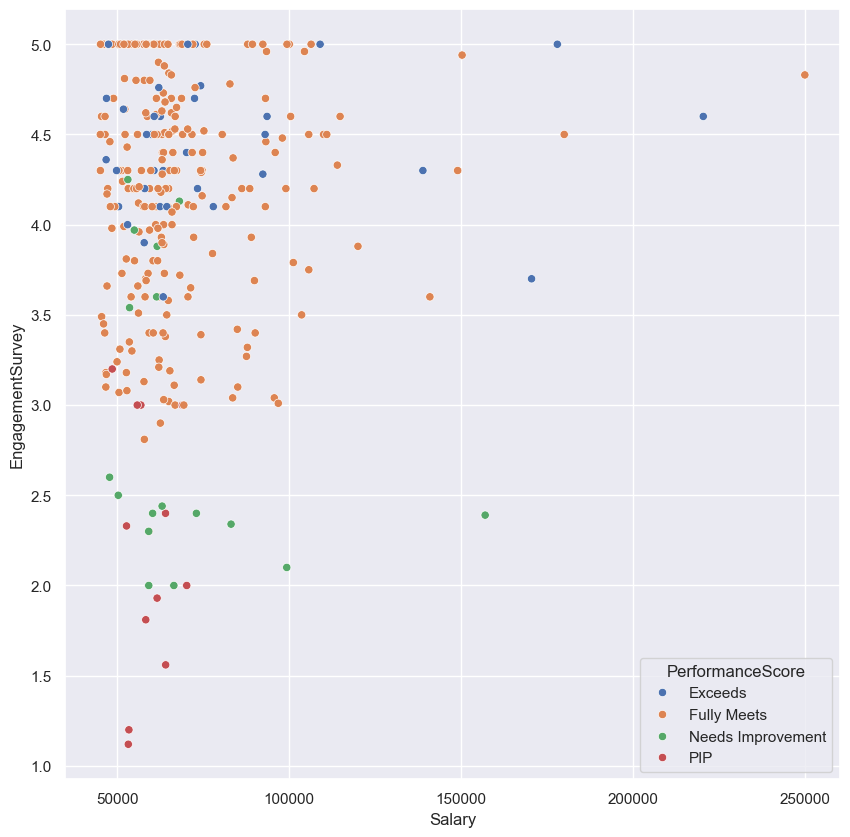

In [18]:
sns.scatterplot(x="Salary",y="EngagementSurvey",hue="PerformanceScore",data=df)

[(34798.3, 120000.0)]

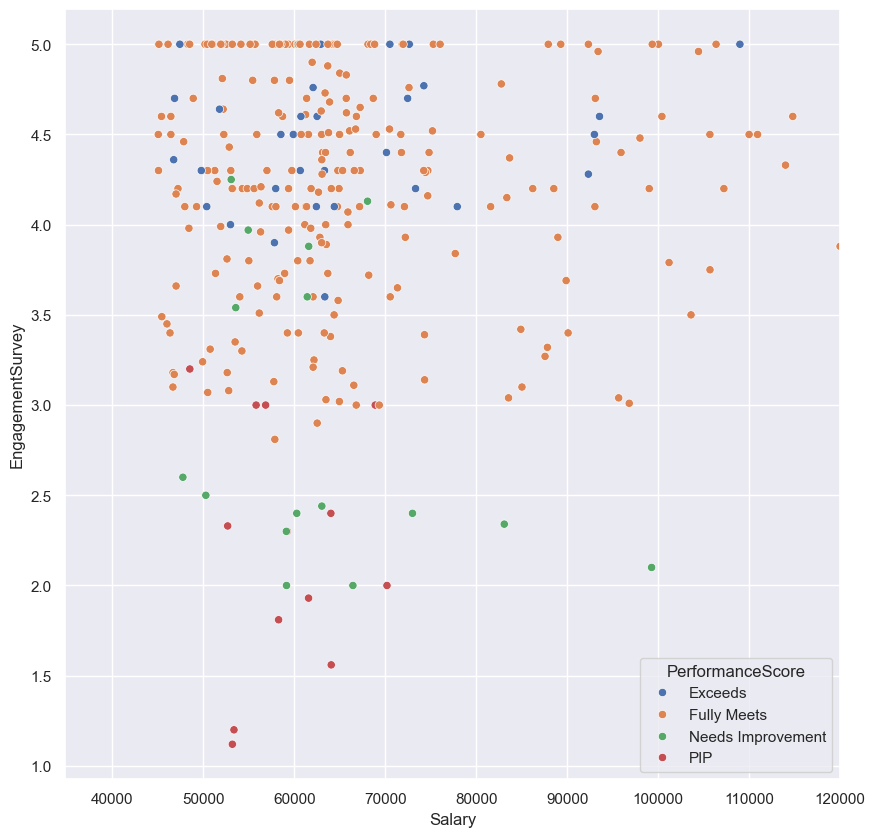

In [19]:
p=sns.scatterplot(x="Salary",y="EngagementSurvey",hue="PerformanceScore",data=df)
p.set(xlim=(None,120000))

[(34798.3, 120000.0)]

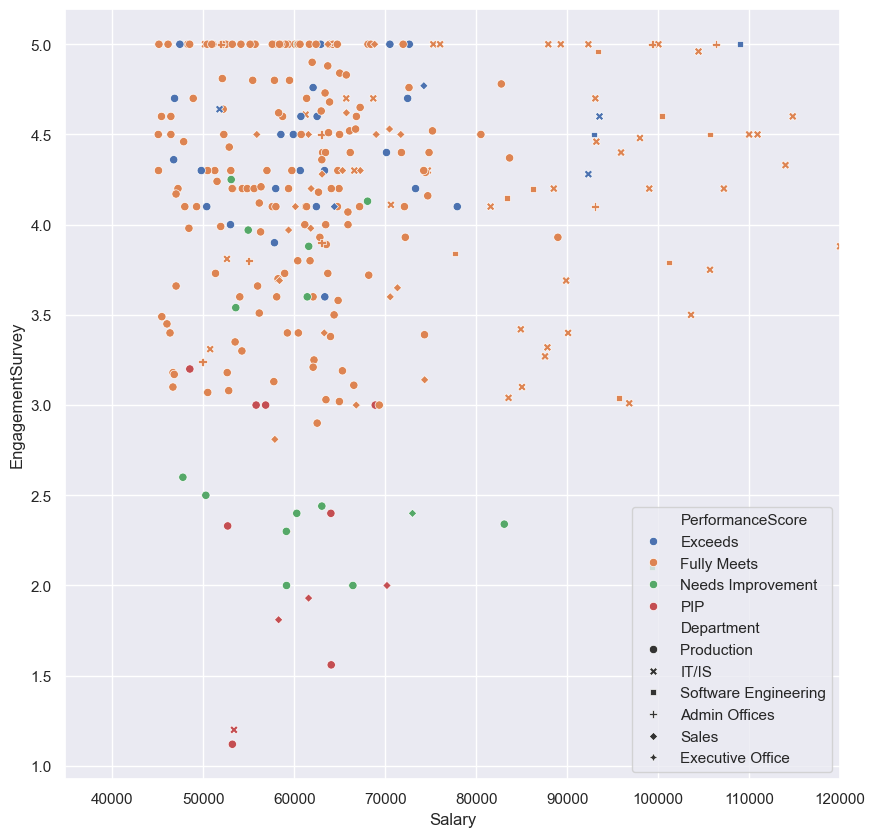

In [20]:
p=sns.scatterplot(x="Salary",y="EngagementSurvey",hue="PerformanceScore",style="Department",data=df)
p.set(xlim=(None,120000))

[(34798.3, 120000.0)]

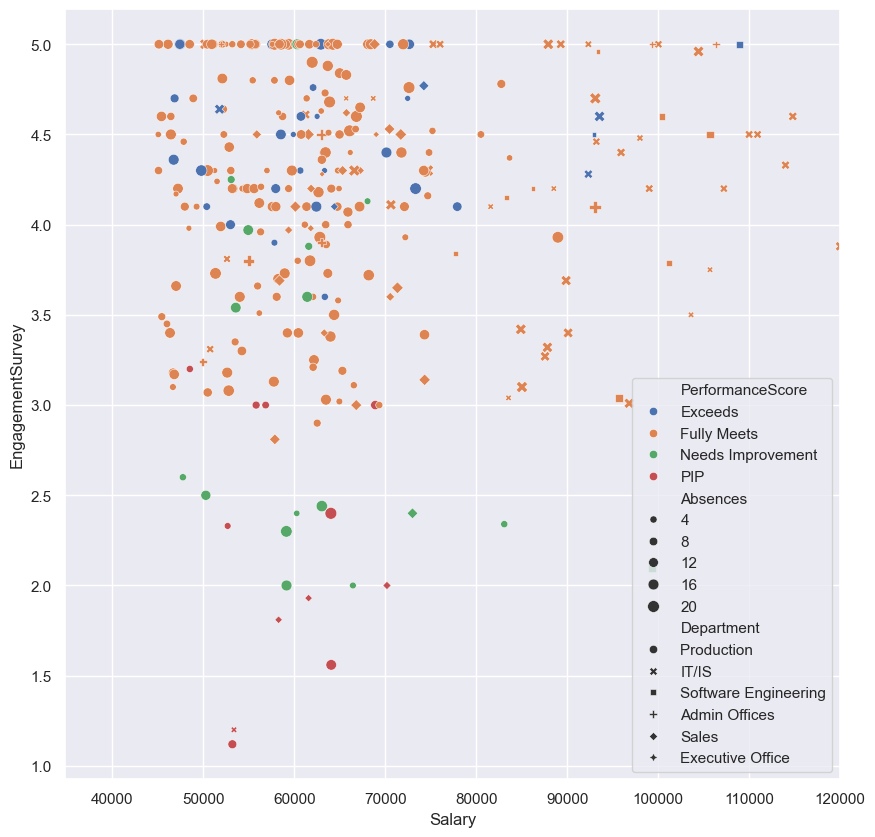

In [21]:
p=sns.scatterplot(x="Salary",y="EngagementSurvey",hue="PerformanceScore",style="Department",size="Absences",data=df)
p.set(xlim=(None,120000))

In [24]:
df.Termd.value_counts()

Termd
0    207
1    104
Name: count, dtype: int64

[(34798.3, 120000.0)]

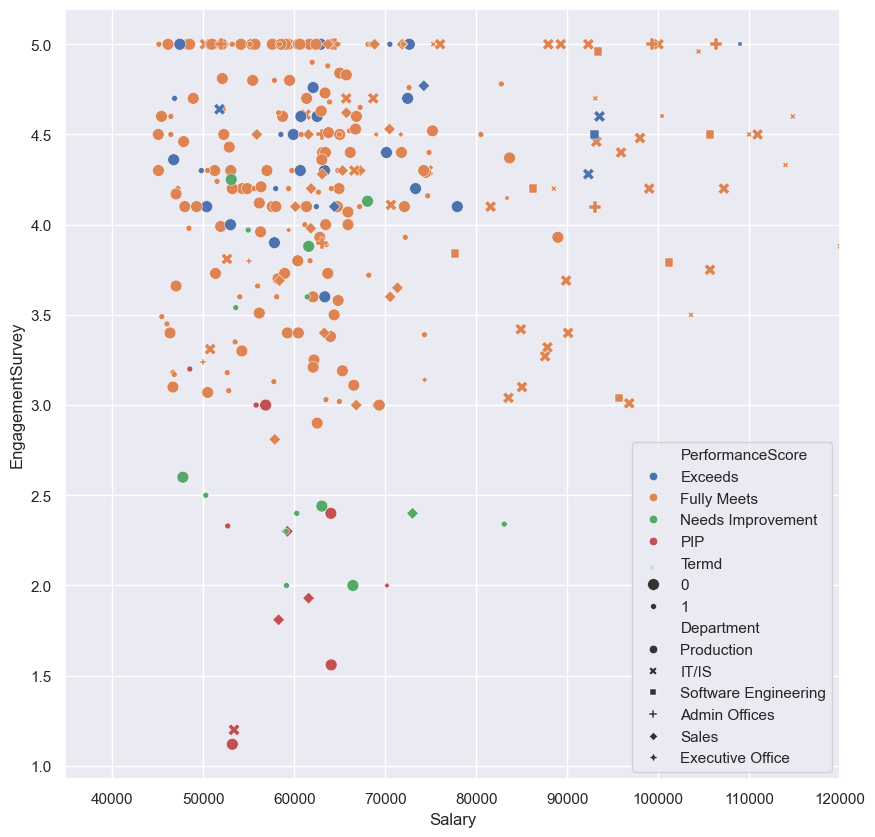

In [25]:
p=sns.scatterplot(x="Salary",y="EngagementSurvey",hue="PerformanceScore",style="Department",size="Termd",data=df)
p.set(xlim=(None,120000))

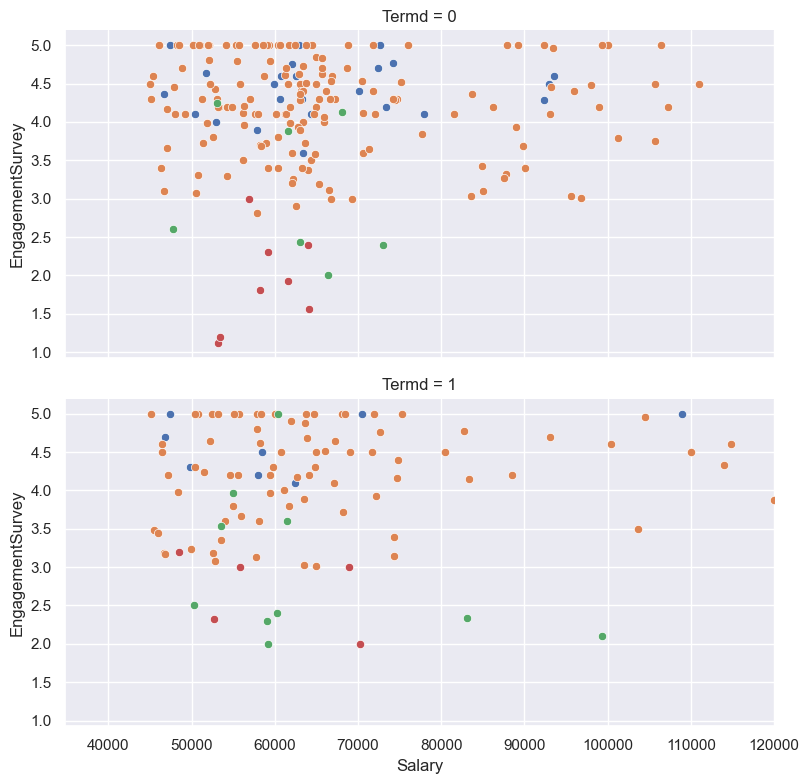

In [32]:
g=sns.FacetGrid(df,row="Termd",hue="PerformanceScore",height=4,aspect=2)
g.map(sns.scatterplot,"Salary","EngagementSurvey")
g.set(xlim=(None,120000))

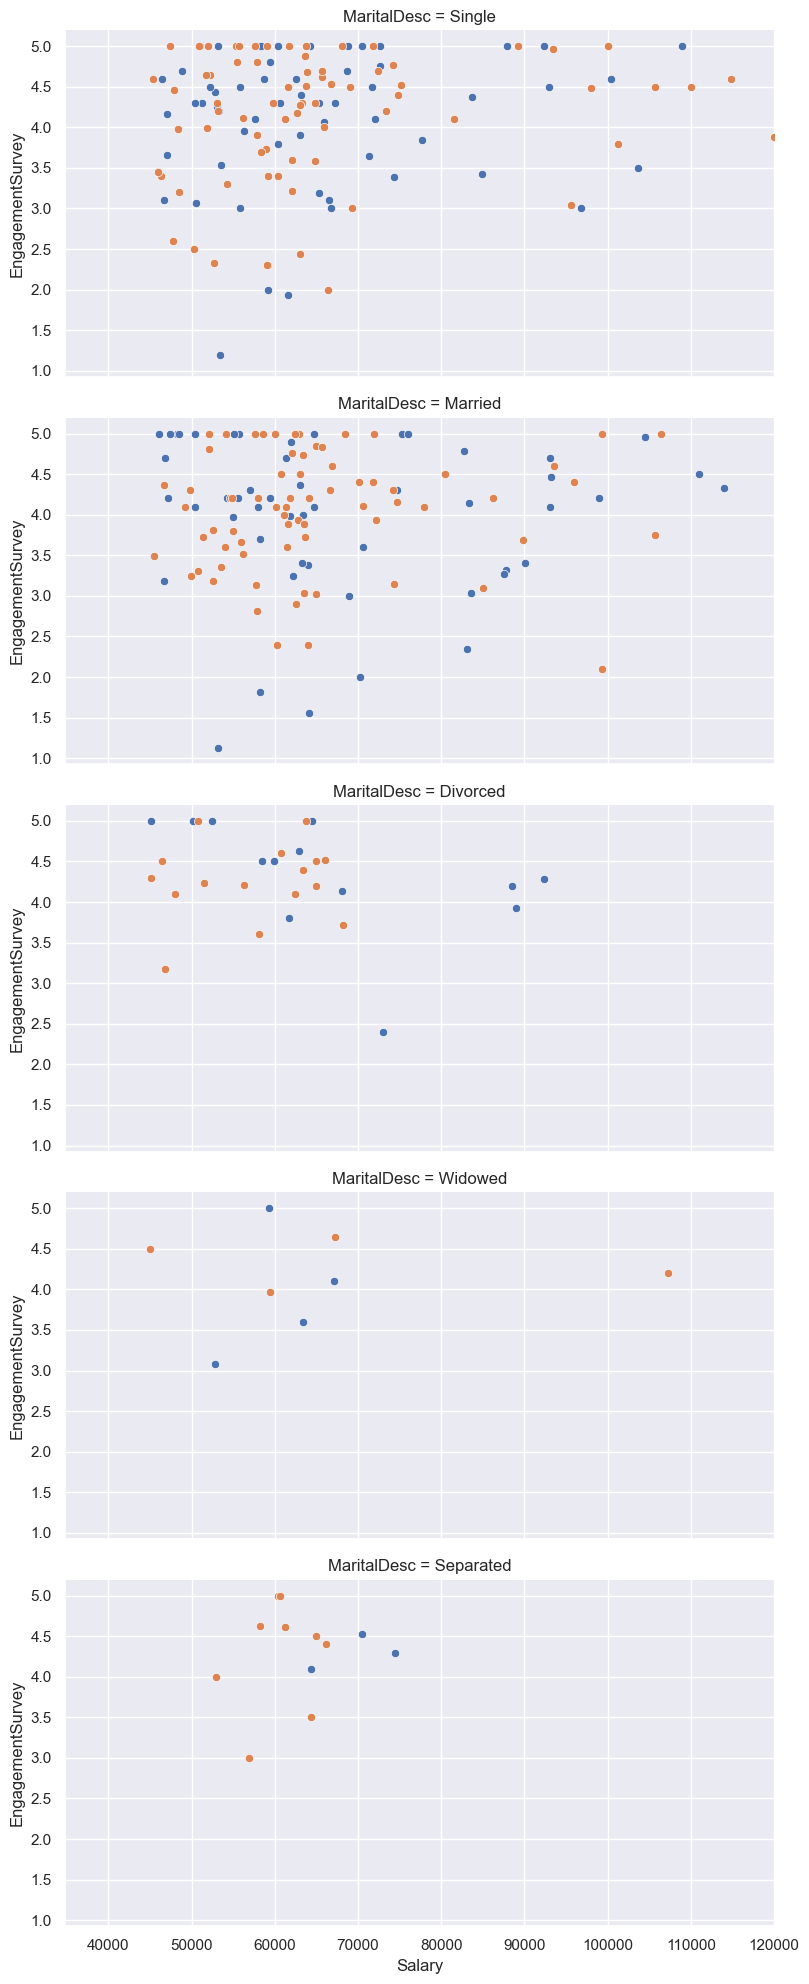

In [36]:
g=sns.FacetGrid(df,row="MaritalDesc",hue="Sex",height=4,aspect=2)
g.map(sns.scatterplot,"Salary","EngagementSurvey")
g.set(xlim=(None,120000))

In [2]:
## Time Series Data
movie=pd.read_csv("movies_metadata.csv")
movie.head()

C:\Users\Srija\AppData\Local\Temp\ipykernel_20588\3403237446.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movie=pd.read_csv("movies_metadata.csv")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [6]:
mov2=movie[["release_date","vote_average","vote_count"]]
mov2=mov2.dropna()

In [7]:
mov2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45376 entries, 0 to 45465
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   release_date  45376 non-null  object 
 1   vote_average  45376 non-null  float64
 2   vote_count    45376 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.4+ MB


In [11]:
mov2["date"]=pd.to_datetime(mov2["release_date"])

In [12]:
mov2["year"]=mov2.date.dt.year

In [13]:
mov2.index=mov2["date"]

In [14]:
mov2.head()

,release_date,vote_average,vote_count,data,date,year
date,,,,,,
1995-10-30,1995-10-30,7.7,5415.0,1995-10-30,1995-10-30,1995
1995-12-15,1995-12-15,6.9,2413.0,1995-12-15,1995-12-15,1995
1995-12-22,1995-12-22,6.5,92.0,1995-12-22,1995-12-22,1995
1995-12-22,1995-12-22,6.1,34.0,1995-12-22,1995-12-22,1995
1995-02-10,1995-02-10,5.7,173.0,1995-02-10,1995-02-10,1995


In [15]:
#Now lets try to plot it

In [2]:
import matplotlib.pyplot as plt

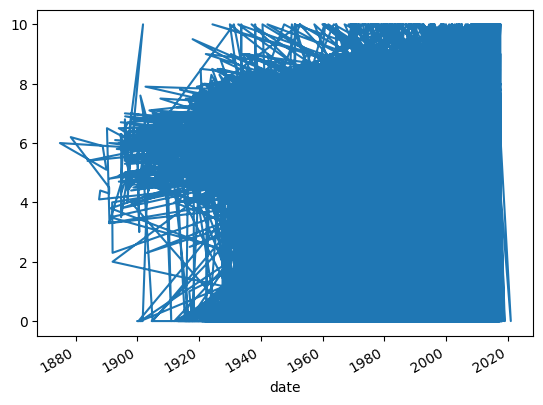

In [18]:
fig,ax=plt.subplots()
ax=mov2.vote_average.plot(label="Average rating by Year")

In [19]:
#this is not right things to do so we should convert it to better

<Axes: xlabel='year', ylabel='vote_average'>

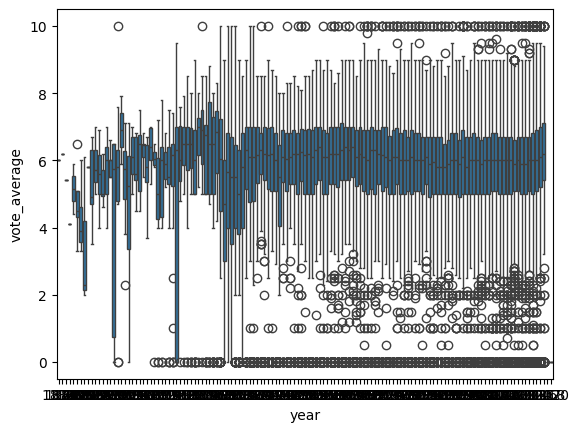

In [20]:
sns.boxplot(data=mov2,x="year",y="vote_average")

In [21]:
#Again it is also cluttered

In [22]:
#lets check ki ye itna cluttered kyu horaha hai so what we can do is to find the maxi year and min yeR

In [23]:
max(mov2.year)

2020

In [24]:
min(mov2.year)

1874

In [25]:
#that's why it is happening

In [30]:
mov3=mov2[mov2["year"]>1950]

<Axes: xlabel='year', ylabel='vote_average'>

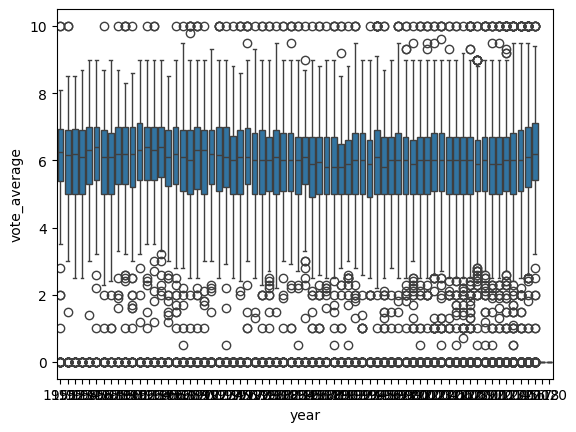

In [31]:
sns.boxplot(data=mov3,x="year",y="vote_average")

In [32]:
#so hume kuch jyada difference dekhne ke liye nahi mil rha ayaha pe so what we acn say is that 

In [33]:
#The expectation of new viewers didn't change over a period of time

In [34]:
#using another dataset for exploring time series

<Axes: xlabel='year', ylabel='vote_average'>

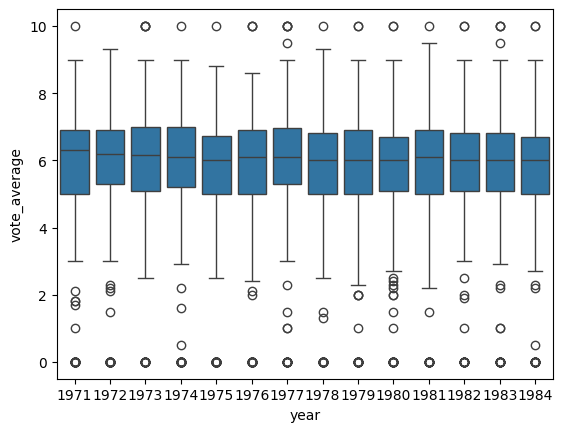

In [37]:
mov4=mov2[(mov2["year"]>1970) & (mov2["year"]<1985)]
sns.boxplot(data=mov4,x="year",y="vote_average")

In [38]:
#From 1971 to 1977 is slighty more than 6

In [39]:
#then it is decreasing and increasing also

In [40]:
#In the late 1980 and 1990 you have like we get few movies in a year not like a 100 of movies like in this decade 

In [41]:
#that would impact the ratings due to which more statist=faction in early years as compared to this years 

In [42]:
#since the past 3 years it is increasing 

In [43]:
#maybe we have less mvoies,maybe we have not captured all the movies

In [44]:
#maybe some moviees whicha re rated higher are captured
#so we verify that by movie counts if it is less than that tells why it is high is 2015,2016,2017

In [45]:
#the more question you probe to yourself the more insight you will get

In [46]:
#wHEN YOU WANT TO EXtract some valuabel insight that slightest difference makes big impact

In [47]:
 #Multidimensional Anlysisa and comparing and contrasting is the real EDA all about